In [1]:
import numpy as np
import pandas as pd
import gzip
import matplotlib.pyplot as plt

# Load the dataset

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


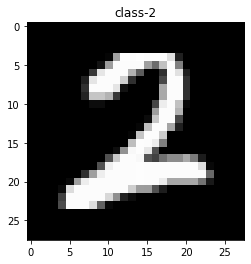

Train image 44541-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   5 162 253 253 255 253 253 253
  224  32   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  19 158 252 252 252 252 159 108 193
  252 128   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  55 230 252 252 252 177  92   0   0  49
  252 225  30   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  33 229 252 252 252 208  49   0   0   0  72
  252 252  48   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  49 2

In [2]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = ''

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)
print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))

rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])

#rand_ids = np.random.choice(train_images.shape[0])
#plt.imshow(train_images[rand_ids, :, :], cmap='Blues')
#plt.title('class-'+str(train_labels[rand_ids]))
#plt.show()

In [3]:

def load_data():
    # Load MNIST dataset
    dataset_path = ""

    train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
    train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

    test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
    test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

    train_images1 = read_images(train_image_filename)
    train_labels = read_labels(train_label_filename)
    #print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images1.shape, train_labels.shape))

    test_images1 = read_images(test_image_filename)
    test_labels1 = read_labels(test_label_filename)
    #print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images1.shape, test_labels.shape))
    train_images =  train_images1.reshape((60000,28*28))
    #print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))
    test_images =  test_images1.reshape((10000,28*28))
    #print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))
    return train_images, train_labels, test_images, test_labels

Partition the dataset
train->80% & validation->20%

In [4]:
import random

In [5]:
shuffle_number = random.sample(range(0,60000),60000)


In [6]:
 train_images, train_labels, test_images, test_labels = load_data()

In [7]:
train_datas = train_images[shuffle_number[0:48000]]
train_datas_labels = train_labels[shuffle_number[0:48000]]

In [8]:
train_labels.shape

(60000,)

In [9]:
validation_datas = train_images[shuffle_number[48000:60000]]

validation_labels_datas = train_labels[shuffle_number[48000:60000]]

check the shape

In [10]:
train_datas.shape

(48000, 784)

In [11]:
validation_datas.shape

(12000, 784)

In [12]:
test_images.shape

(10000, 784)

In [13]:
test_labels.shape

(10000,)

# Define the algorithm

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [15]:
def logistic(X, y, learning_rate, num_iterations):
    """Train logistic regression model"""
    num_samples, num_features = X.shape
    num_classes = len(np.unique(y))
    theta = np.zeros((num_features, num_classes))  # Initialize parameters
    
    for iteration in range(num_iterations):
        # Calculate the logits
        z = np.dot(X, theta)
        h = sigmoid(z)
        
        # Calculate the gradient
        gradient = np.dot(X.T, (h - np.eye(num_classes)[y])) / num_samples
        
        # Update the parameters
        theta -= learning_rate * gradient
    
    return theta

In [16]:

def predict(X, theta):
    """Make predictions using the trained model"""
    z = np.dot(X, theta)
    h = sigmoid(z)
    predictions = np.argmax(h, axis=1)
    return predictions

In [17]:
def confusion_matrix(true_labels, predicted_labels):
    """Calculate the confusion matrix"""
    num_classes = len(np.unique(true_labels))
    matrix = np.zeros((num_classes, num_classes), dtype=np.int)
    
    for true_label, predicted_label in zip(true_labels, predicted_labels):
        matrix[true_label][predicted_label] += 1
    
    return matrix

Normalize pixel values between 0 and 1

In [18]:
# Preprocess the data
train_datas= train_datas / 255.0  # Normalize pixel values between 0 and 1
validation_datas = validation_datas/255.0
test_images = test_images / 255.0


 Add a column of ones to the feature matrix for the bias term

In [19]:
# Add a column of ones to the feature matrix for the bias term
train_datas = np.c_[np.ones(train_datas.shape[0]), train_datas]
validation_datas = np.c_[np.ones(validation_datas.shape[0]), validation_datas]
test_images = np.c_[np.ones(test_images.shape[0]), test_images]

In [20]:
train_datas.shape

(48000, 785)

In [21]:
validation_datas.shape

(12000, 785)

In [22]:
test_images.shape

(10000, 785)

In [23]:
# Set hyperparameters
learning_rate = 0.1
num_iterations = 1000

Train model

In [24]:
# Train the model
theta = logistic(train_datas, train_datas_labels, learning_rate, num_iterations)

Check for validation set

In [25]:
# Make predictions on the validation set
predictions1 = predict(validation_datas, theta)

In [26]:
# Evaluate the accuracy of the validition set
accuracy = np.mean(predictions1 == validation_labels_datas) * 100
print("Accuracy:", accuracy)

Accuracy: 89.325


In [27]:
# Calculate the confusion matrix
confusion_mat = confusion_matrix(validation_labels_datas, predictions1)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[1116    0    0    3    1    3   11    1   13    0]
 [   0 1265    4    4    2   13    1    2   13    2]
 [   8   14 1094   14   27    3   20   30   49    8]
 [   7   14   32 1073    3   31   16   16   30   16]
 [   1    6   11    1 1053    2   13    2   23   68]
 [  27   17    7   58   16  834   30    6   57   26]
 [  13    5    8    1    6   15 1121    0    8    0]
 [   4   16   12    7   20    1    2 1131    1   43]
 [   9   34   20   35    8   42    6   10  989   17]
 [   7    6    5   20   42    8    1   54   13 1043]]


/tmp/ipykernel_5065/940334558.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  matrix = np.zeros((num_classes, num_classes), dtype=np.int)


In [28]:
print("Confusion Matrix:")
pd.crosstab(np.array(validation_labels_datas),np.array(predictions1),rownames = ['true label'],colnames = ['predict labels'])

Confusion Matrix:


predict labels     0     1     2     3     4    5     6     7    8     9
true label                                                              
0               1116     0     0     3     1    3    11     1   13     0
1                  0  1265     4     4     2   13     1     2   13     2
2                  8    14  1094    14    27    3    20    30   49     8
3                  7    14    32  1073     3   31    16    16   30    16
4                  1     6    11     1  1053    2    13     2   23    68
5                 27    17     7    58    16  834    30     6   57    26
6                 13     5     8     1     6   15  1121     0    8     0
7                  4    16    12     7    20    1     2  1131    1    43
8                  9    34    20    35     8   42     6    10  989    17
9                  7     6     5    20    42    8     1    54   13  1043

Prediction over the test dataset

In [29]:
# Make predictions on the test set
predictions = predict(test_images, theta)

# Evaluate the accuracy
accuracy = np.mean(predictions == test_labels) * 100
print("Accuracy:", accuracy)
# Calculate the confusion matrix
confusion_mat = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:")
print(confusion_mat)


Accuracy: 90.11
Confusion Matrix:
[[ 962    0    2    2    0    0    7    1    6    0]
 [   0 1101    2    3    1    1    4    2   21    0]
 [  10   12  880   20   14    0   16   18   53    9]
 [   6    1   19  907    1   25    6   14   20   11]
 [   2    3    7    0  899    1   10    1   10   49]
 [  17    6    5   49   18  709   20   10   45   13]
 [  11    3    4    3    9   15  905    1    7    0]
 [   3   18   27    4    9    0    2  927    2   36]
 [  11   10    9   23    9   22   13   14  853   10]
 [  12    8    8   14   44   11    0   33   11  868]]


/tmp/ipykernel_5065/940334558.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  matrix = np.zeros((num_classes, num_classes), dtype=np.int)


Confusion matrix for test dataset

In [30]:
pd.crosstab(np.array(test_labels),np.array(predictions),rownames = ['true label'],colnames = ['predict labels'])

predict labels    0     1    2    3    4    5    6    7    8    9
true label                                                       
0               962     0    2    2    0    0    7    1    6    0
1                 0  1101    2    3    1    1    4    2   21    0
2                10    12  880   20   14    0   16   18   53    9
3                 6     1   19  907    1   25    6   14   20   11
4                 2     3    7    0  899    1   10    1   10   49
5                17     6    5   49   18  709   20   10   45   13
6                11     3    4    3    9   15  905    1    7    0
7                 3    18   27    4    9    0    2  927    2   36
8                11    10    9   23    9   22   13   14  853   10
9                12     8    8   14   44   11    0   33   11  868